# LU for a tridiagonal matrix

In [1]:
import numpy as np
from scipy.sparse import diags, csr_matrix

def gen_trid(N) -> csr_matrix:
    data = [5 + 5*np.random.rand(N),
            -1. * np.ones(N - 1),
            -1. * np.ones(N - 1)]

    A = diags(data, offsets=[0, 1, -1], shape=(N, N), format='csr')
    return A

In [2]:
# Assumes A is tridiagonal already. Does not do any checking!
def lu_trid(A):
    U = np.copy(A.todense())
    L = np.zeros_like(A.todense())
    for row in range(A.shape[0]):
        L[row,row] = U[row,row]
        U[row,:] /= U[row,row]
        # since the matrix is tridiagonal, we only need to do the following once:
        if row != (A.shape[0]-1):
            L[row+1, row] = U[row+1, row]
            U[row+1, :] -= U[row+1, row] * U[row, :]
    return csr_matrix(L), csr_matrix(U)

In [3]:
A = gen_trid(5)
L, U = lu_trid(A)
(L@U - A).todense()

matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]])

In [4]:
# Normal LU from lecture
def lu(A):
    n = A.shape[0]
    assert A.shape[1] == n
    L = np.zeros((n, n))
    for row in range(n):
        L[row,row] = A[row,row]
        A[row,:] /= A[row,row]

        for i in range(row+1, n):
            L[i, row] = A[i, row]
            A[i, :] -= A[i, row] * A[row, :]
    return L, A

In [5]:
from timeit import timeit

def time_lu():
    t_tri = timeit("lu_trid(A)", "from __main__ import A, lu_trid", number=1)
    t_norm = timeit("lu(Ad)", "from __main__ import Ad, lu", number=1)
    return t_tri, t_norm

x = [2, 5, 10, 25, 50, 100, 250, 500, 1000, 2500]
times = np.zeros((2, len(x)))
for i, n in enumerate(x):
    A = gen_trid(n)
    Ad = A.todense()
    t_tri, t_norm = time_lu()
    times[0, i] = t_tri
    times[1, i] = t_norm

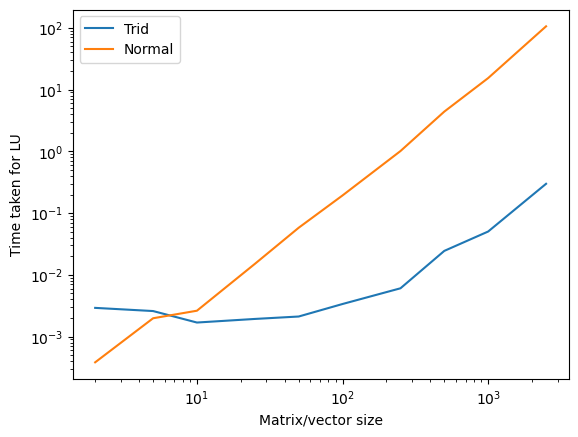

In [6]:
import matplotlib.pyplot as plt

plt.plot(x, times[0, :])
plt.plot(x, times[1, :])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Matrix/vector size")
plt.ylabel("Time taken for LU")
plt.legend(["Trid", "Normal"])